<a href="https://colab.research.google.com/github/ddlcz/mit-datasci-program/blob/main/Clicks_Food_Data_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DataSci/Week 5 - Deep Learning/Optional Project/Food_Data.zip'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import zipfile

import cv2
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

In [ ]:
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
DATADIR = '/content/Food_Data/Training'
CATEGORIES = ['Bread', 'Soup', 'Vegetable-Fruit']
IMG_SIZE = 150

In [ ]:
#create empty list
training_data = []

#function called create_training_data,
def create_training_data():
  #goes through all categories
  for category in CATEGORIES:
    #concatenate data directory path and category name /content/Food_Data/Training/Bread
    path = os.path.join(DATADIR, category)
    #create a class name assigned to each category
    class_num = category

    #for every image in our path
    for img in os.listdir(path):
      #read images in the path and join new path /content/Food_Data/Training/Bread with filename, convert it to a numpy array
      img_array = cv2.imread(os.path.join(path, img))
      #create a new array and resize image to the size specified
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      #call into empty list and append new image and correspnding class names
      training_data.append([new_array, class_num])

In [ ]:
create_training_data()

In [ ]:
training_data[0]

[array([[[ 48,  65,  55],
         [ 51,  68,  59],
         [ 51,  68,  58],
         ...,
         [ 35,  62,  99],
         [ 34,  55,  93],
         [ 37,  55,  93]],
 
        [[ 79,  96,  85],
         [ 79,  96,  85],
         [ 79,  96,  85],
         ...,
         [ 24,  44,  81],
         [ 21,  39,  78],
         [ 41,  55,  97]],
 
        [[ 89, 107,  94],
         [ 89, 107,  94],
         [ 87, 105,  92],
         ...,
         [ 13,  26,  70],
         [ 19,  30,  78],
         [ 35,  46,  96]],
 
        ...,
 
        [[110, 124, 118],
         [111, 125, 119],
         [ 99, 113, 107],
         ...,
         [104, 109, 100],
         [107, 110, 102],
         [109, 110, 106]],
 
        [[112, 122, 116],
         [113, 123, 117],
         [114, 123, 117],
         ...,
         [106, 109, 103],
         [110, 111, 107],
         [112, 113, 109]],
 
        [[117, 122, 121],
         [117, 123, 122],
         [113, 121, 120],
         ...,
         [106, 112, 105],
  

In [ ]:
training_data[0][0].shape

(150, 150, 3)

In [ ]:
DATADIR_test = '/content/Food_Data/Testing'


In [ ]:
testing_data = []

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_test, category)
    class_num = category

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      testing_data.append([new_array, class_num])

In [ ]:
create_testing_data()

In [ ]:
testing_data[0]

[array([[[217, 185, 150],
         [218, 185, 152],
         [216, 182, 153],
         ...,
         [ 29,  24,  21],
         [ 30,  27,  20],
         [ 25,  22,  14]],
 
        [[220, 186, 156],
         [218, 184, 154],
         [215, 181, 151],
         ...,
         [ 20,  15,  12],
         [ 21,  17,  12],
         [ 19,  15,  10]],
 
        [[219, 184, 157],
         [213, 179, 150],
         [216, 183, 150],
         ...,
         [ 13,  10,   6],
         [ 16,  13,   9],
         [ 16,  12,  11]],
 
        ...,
 
        [[194, 188, 193],
         [199, 190, 193],
         [203, 197, 197],
         ...,
         [233, 218, 185],
         [202, 189, 157],
         [145, 131, 103]],
 
        [[191, 184, 188],
         [194, 190, 190],
         [202, 201, 200],
         ...,
         [152, 148, 118],
         [162, 153, 125],
         [201, 187, 162]],
 
        [[187, 180, 181],
         [187, 185, 183],
         [187, 188, 184],
         ...,
         [138, 145, 122],
  

# Exploratory Data analysis

In [ ]:
#print data directory
print(f"{DATADIR}/{CATEGORIES[0]}")

/content/Food_Data/Training/Bread


In [ ]:
#display # of bread images
#for filename in the directory of breads
bread_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[0]}")] #python string formatting - reference variables declared
#find # of bread images, can use len because it's a list
len(bread_imgs)

994

In [ ]:
#From bread images, chose 9 random items, and do not show duplicates
select_bread = np.random.choice(bread_imgs, 9, replace=False)
select_bread

array(['509.jpg', '647.jpg', '611.jpg', '762.jpg', '486.jpg', '391.jpg',
       '700.jpg', '729.jpg', '724.jpg'], dtype='<U7')

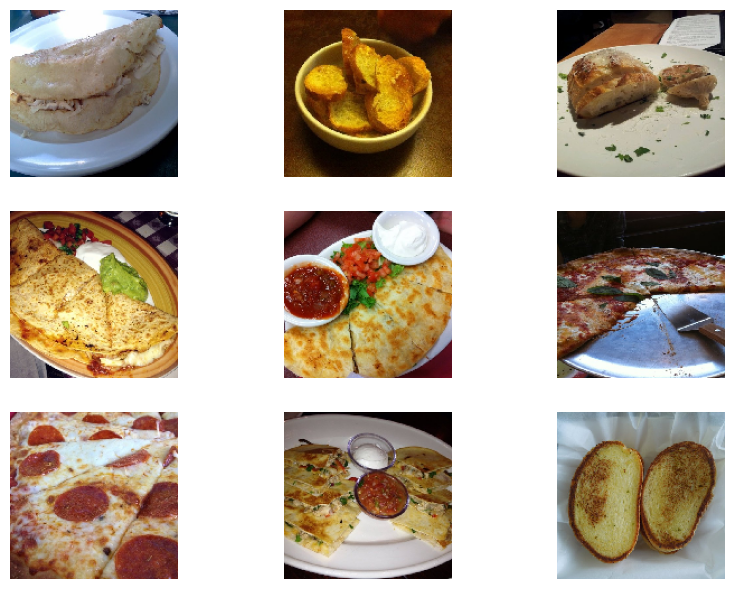

In [ ]:
#create a figure in matplotlib, can also use subplot method
fig = plt.figure(figsize=(10,10))

#9 images, create an axis
for i in range(9):
  ax = fig.add_subplot(4,3,i+1) #each time create a new axis

#specify file path f"{DATADIR}/{CATEGORIES[0]}
#select_bread, index into ith instance
  fp = f"{DATADIR}/{CATEGORIES[0]}/{select_bread[i]}"

  #open image (filepath, target size)
  fn = load_img(fp, target_size=(150,150))

  #pieplots imshow to display
  plt.imshow(fn, )
  plt.axis('off')

In [ ]:
CATEGORIES[1]

In [ ]:
soup_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[1]}")]
len(soup_imgs)

1500

In [ ]:
select_soup= np.random.choice(bread_imgs, 9, replace=False)
select_soup

array(['828.jpg', '614.jpg', '926.jpg', '185.jpg', '650.jpg', '392.jpg',
       '107.jpg', '428.jpg', '699.jpg'], dtype='<U7')

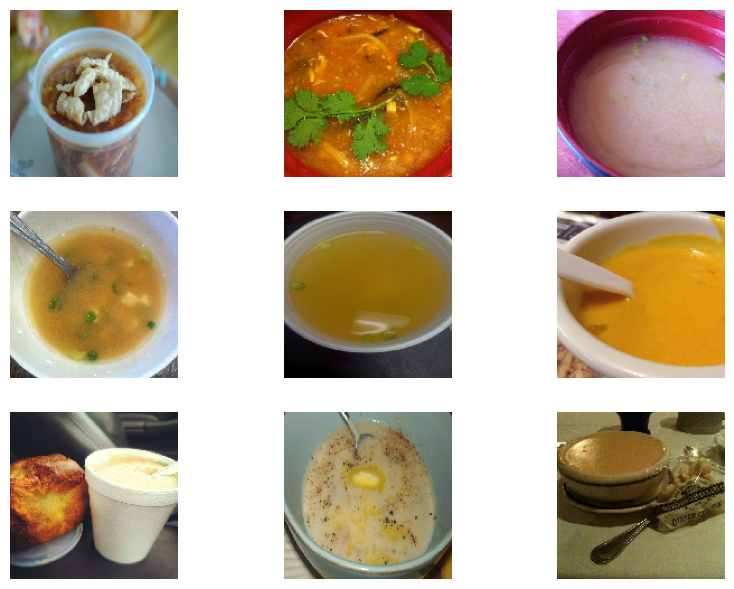

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

#specify file path
#index of soup file names
  fp = f"{DATADIR}/{CATEGORIES[1]}/{select_soup[i]}"

  fn = load_img(fp, target_size=(150,150))

  plt.imshow(fn, )
  plt.axis('off')

In [ ]:
CATEGORIES[2]

'Vegetable-Fruit'

In [ ]:
veg_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[2]}")]
len(soup_imgs)

1500

In [ ]:
select_veg = np.random.choice(veg_imgs, 9, replace=False)
select_veg

array(['420.jpg', '293.jpg', '625.jpg', '371.jpg', '113.jpg', '586.jpg',
       '661.jpg', '212.jpg', '655.jpg'], dtype='<U7')

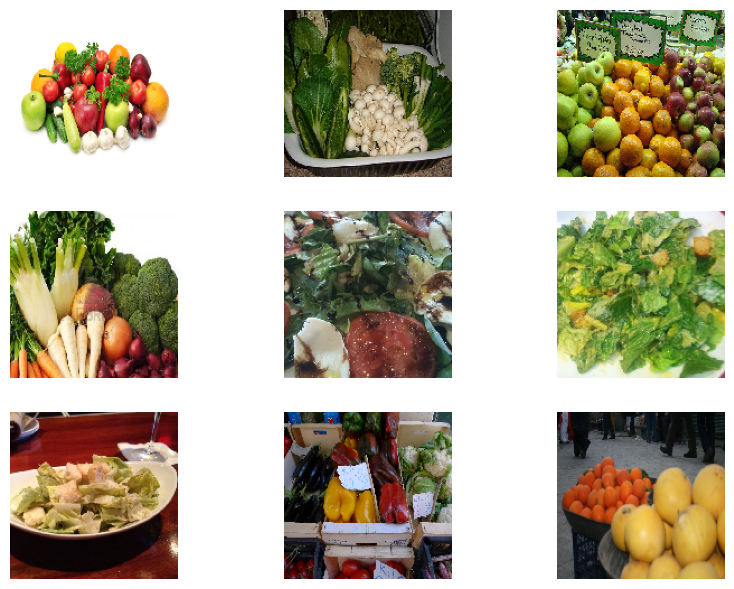

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  ax = fig.add_subplot(4,3,i+1)

#specify file path
#index of soup file names
  fp = f"{DATADIR}/{CATEGORIES[2]}/{select_veg[i]}"

  fn = load_img(fp, target_size=(150,150))

  plt.imshow(fn, )
  plt.axis('off')

In [ ]:
#create empty lists and populate them later
X_train = []
y_train = []

#shuffle training data list in place
np.random.shuffle(training_data)

In [ ]:
#decouple images and labels in the training data - for loop
#for tuple of image and label list
for image, label in training_data:
# X = images, Y = labels
#add the image to the X_test empty list
# add label to the y_train empty list
  X_train.append(image)
  y_train.append(label)

In [ ]:
y_train

['Soup',
 'Bread',
 'Soup',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Soup',
 'Bread',
 'Soup',
 'Bread',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Bread',
 'Vegetable-Fruit',
 'Bread',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Soup',
 'Vegetable-Fruit',
 'Bread',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Soup',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Bread',
 'Vegetable-Fruit',
 'Soup',
 'Bread',
 'Vegetable-Fruit',
 'Soup',
 'Vegetable-Fruit',
 'Bread',
 'Bread',
 'Soup',
 'Soup',
 'Soup',
 'Bread',
 'Soup',
 'Bread',
 'Bread',
 'Bread',
 'Bread',
 'Vegetable-Fruit',
 'Vegetable-Fruit',
 'Bread',
 'Soup',
 'Bread',
 'Bread',
 'Soup',
 'Soup',
 'Soup',
 'Bread',
 'Vegetable-Fruit',
 'Soup',
 'Bread',
 'Soup',
 'Bread',
 'Soup',
 'Vegetable-Fruit',
 'Bread',
 'Bread',
 'Soup',
 'Vegetable-Fruit',
 'Soup',
 'Bread',
 'Bread',
 'Soup',
 'Soup',
 'Bread',
 'Bread',
 'Soup',
 'Bread',
 'Bread',
 '

In [ ]:
np.random.shuffle(testing_data)

In [ ]:
#do the same for testing data
X_test = []
y_test = []
for image, label in testing_data:
  X_test.append(image)
  y_test.append(label)

In [ ]:
#X and Y are lists, easier to work w/ vs. numpy arrays
#assign this back as numpy array - can look at shape
X_train = np.array(X_train)
X_test = np.array(X_test)

#display shape (# of images, h pixels, w pixels, 3 channels = colored image)
X_train.shape, X_test.shape

((3203, 150, 150, 3), (1094, 150, 150, 3))

In [ ]:
#Turn labels into a dataframe --> eventually need to convert to integers for one-hot encoded
#can index into it and do operations on column
y_train = pd.DataFrame(y_train, columns=['Label'], dtype=object)
y_test = pd.DataFrame(y_test, columns=['Label'], dtype=object)

In [ ]:
y_train

In [ ]:
#Value count on training label dataframe
y_train.Label.value_counts(#normalize=True)

SyntaxError: incomplete input (<ipython-input-28-8f710adae537>, line 2)

In [ ]:
y_test.Label.value_counts()

Soup               500
Bread              362
Vegetable-Fruit    232
Name: Label, dtype: int64

In [ ]:
#Image pre-processing - normalization | number of pixels 255
X_train = X_train/255.0

In [ ]:
#turn numbers from 0-255, to 0-1
X_train.min(),X_train.max()

(0.0, 1.0)

In [ ]:
X_test = X_test/255

In [ ]:
X_test.min(), X_test.max()

(0.0, 1.0)

In [ ]:
#Pre-precessing for y labels - turn into integers and then one-hot encoded vectors

#create y train empty list
y_train_encoded = []

#for label_name in the labels column in dataframe
#for all instances of bread=0, soup=1, veg=2

for label_name in y_train.Label:
  #if label name = bread, append 0
  if label_name == "Bread":
    y_train_encoded.append(0)
  #if label name = soup, append 1
  if label_name == "Soup":
    y_train_encoded.append(1)
  #label name = veg/fruit, append 2
  if label_name == "Vegetable-Fruit":
    y_train_encoded.append(2)

In [ ]:
y_train_encoded

[1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,


In [ ]:
#turn integers into categorical variables, assign back to y_train encoded
y_train_encoded = to_categorical(y_train_encoded)

y_train_encoded

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y_train_encoded.shape, X_train.shape


((3203, 3), (3203, 150, 150, 3))

In [ ]:
#for loop to assign integers to labels
y_test_encoded = []

for label_name in y_test.Label:
  if label_name == "Bread":
    y_test_encoded.append(0)
  if label_name == "Soup":
    y_test_encoded.append(1)
  if label_name == "Vegetable-Fruit":
    y_test_encoded.append(2)

In [ ]:
#turn integers into one-hot encoded vectors
y_test_encoded = to_categorical(y_test_encoded)
y_test_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
#make sure # labels match # of images
y_test_encoded.shape, X_test.shape

((1094, 3), (1094, 150, 150, 3))

In [ ]:
#import backend from keras - free up memory and removes other models
backend.clear_session()

In [ ]:
import random

In [ ]:
#seed() used to initialize random number generator
seed = 42
random.seed()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
LeakyReLU()

In [ ]:
X_train.shape

(3203, 150, 150, 3)

In [ ]:
model = Sequential()
#convultion 2d
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = (150,150,3)))
#cuts model in half
model.add(MaxPooling2D(padding='same'))


model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150,150,3)))
model.add(MaxPooling2D(padding='same'))

model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150,150,3)))
model.add(MaxPooling2D(padding='same'))

model.add(Flatten()) #flatten does not take any hyperparameters or resize 19*19*32

model.add(Dense(100, activation='relu')) #reduces 11552 large output

#add classification layer, another dense layer
#if binary, activation = sigma
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 32)        0

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss =tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 32)        0

In [ ]:
#callbacks - early stopping & model checkpoint
es = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [ ]:
import tensorflow as tf

In [ ]:
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=60, validation_split=0.1, callbacks=[es, mc])

In [ ]:
model.load_weights(#"path of best model from ^")